
# Import Library Yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import skfuzzy as fuzz
from skfuzzy import cluster
from pathlib import Path
import os
from glob import glob

# Load Semua Dataset yang dibutuhkan

In [3]:
BASE_DIR = Path('dataset')
TRAIN_DIR = BASE_DIR / 'train'


In [4]:
KOMODITAS = {
    'bawang_merah': 'Bawang Merah.csv',
    'beras_medium': 'Beras Medium.csv',
    'beras_premium' : 'Beras Premium.csv',
    'minyak_curah': 'Minyak Goreng Curah.csv',
    'telur_ayam': 'Telur Ayam Ras.csv',
    'gula': 'Gula Konsumsi.csv',
    'Bawang_Putih_Bonggol' : 'Bawang Putih Bonggol.csv',
    'Cabai_Merah_Keriting' : 'Cabai Merah Keriting.csv',
    'Cabai_Rawit_Merah' : 'Cabai Rawit Merah.csv',
    'Daging_Ayam_Ras' : 'Daging Ayam Ras.csv',
    'Daging_Sapi_Murni': 'Daging Sapi Murni.csv',
    'Minyak_Goreng_Kemasan_Sederhana' : 'Minyak Goreng Kemasan Sederhana.csv',
    'Tepung_Terigu_Curah' : 'Tepung Terigu (Curah).csv'
}



In [5]:
data = {}
for key, filename in KOMODITAS.items():
    file_path = TRAIN_DIR / filename
    data[key] = pd.read_csv(file_path)
    print(f"✓ {key}: {data[key].shape}")


✓ bawang_merah: (1004, 35)
✓ beras_medium: (1004, 35)
✓ beras_premium: (1004, 35)
✓ minyak_curah: (1004, 35)
✓ telur_ayam: (1004, 35)
✓ gula: (1004, 35)
✓ Bawang_Putih_Bonggol: (1004, 35)
✓ Cabai_Merah_Keriting: (1004, 35)
✓ Cabai_Rawit_Merah: (1004, 35)
✓ Daging_Ayam_Ras: (1004, 35)
✓ Daging_Sapi_Murni: (1004, 35)
✓ Minyak_Goreng_Kemasan_Sederhana: (1004, 35)
✓ Tepung_Terigu_Curah: (1004, 35)


# EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
print("=" * 70)
print("DATA SHAPE")
print("=" * 70)
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")


DATA SHAPE
bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
minyak_curah         : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Cabai_Rawit_Merah    : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


In [7]:
print("\n" + "=" * 70)
print("SAMPLE DATA: Bawang Merah (First 5 rows)")
print("=" * 70)
print(data['bawang_merah'].head())


SAMPLE DATA: Bawang Merah (First 5 rows)
         Date     Aceh     Bali   Banten  Bengkulu  DI Yogyakarta  \
0  2022-01-01  28970.0  20870.0  26890.0   26650.0        25240.0   
1  2022-01-02  29900.0  20710.0  25600.0   26950.0        25240.0   
2  2022-01-03  28970.0  20510.0  26390.0   27290.0        24620.0   
3  2022-01-04  29600.0  20180.0  26630.0   27450.0        24370.0   
4  2022-01-05  29540.0  19960.0  26610.0   27710.0        24210.0   

   DKI Jakarta  Gorontalo    Jambi  Jawa Barat  ...    Papua     Riau  \
0      35510.0    31740.0  23390.0     25800.0  ...  48610.0  29240.0   
1      31850.0    30020.0  23550.0     26010.0  ...  50160.0  28750.0   
2      34880.0    31250.0  23730.0     25910.0  ...  49510.0  27870.0   
3      35260.0    31640.0  23300.0     25950.0  ...  49670.0  28330.0   
4      35260.0    34010.0  23640.0     25700.0  ...  46590.0  28240.0   

   Sulawesi Barat  Sulawesi Selatan  Sulawesi Tengah  Sulawesi Tenggara  \
0         25160.0           2

In [8]:
print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
for key, df in data.items():
    total_cells = df.shape[0] * df.shape[1]
    missing = df.isnull().sum().sum()
    missing_pct = (missing / total_cells) * 100
    print(f"{key:20s} : {missing} missing ({missing_pct:.2f}%)")


MISSING VALUES
bawang_merah         : 1241 missing (3.53%)
beras_medium         : 1241 missing (3.53%)
beras_premium        : 1241 missing (3.53%)
minyak_curah         : 5437 missing (15.47%)
telur_ayam           : 1241 missing (3.53%)
gula                 : 1241 missing (3.53%)
Bawang_Putih_Bonggol : 1241 missing (3.53%)
Cabai_Merah_Keriting : 1244 missing (3.54%)
Cabai_Rawit_Merah    : 2035 missing (5.79%)
Daging_Ayam_Ras      : 1241 missing (3.53%)
Daging_Sapi_Murni    : 1245 missing (3.54%)
Minyak_Goreng_Kemasan_Sederhana : 1289 missing (3.67%)
Tepung_Terigu_Curah  : 1242 missing (3.53%)


In [9]:
print("=" * 70)
print("MISSING VALUE PATTERN ANALYSIS")
print("=" * 70)

for key, df in data.items():
    print(f"\n📊 {key.upper()}")
    print("-" * 70)
    
    # Hitung missing per kolom (provinsi)
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0].sort_values(ascending=False)
    
    if len(missing_per_col) > 0:
        print(f"Provinsi dengan missing value:")
        for prov, count in missing_per_col.head(10).items():
            pct = (count / len(df)) * 100
            print(f"  {prov:25s} : {count:4d} missing ({pct:5.2f}%)")
    else:
        print("  ✓ No missing values")
    
    # Hitung missing per baris (tanggal)
    missing_per_row = df.isnull().sum(axis=1)
    rows_with_missing = (missing_per_row > 0).sum()
    print(f"\nBaris dengan missing: {rows_with_missing} dari {len(df)} ({(rows_with_missing/len(df))*100:.2f}%)")

MISSING VALUE PATTERN ANALYSIS

📊 BAWANG_MERAH
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat               :   39 missing ( 3.88%)
  Kalimantan Utara          :   39 missing ( 3.88%)
  Sumatera Selatan          :   38 missing ( 3.78%)
  Kepulauan Bangka Belitung :   38 missing ( 3.78%)
  Jambi                     :   38 missing ( 3.78%)
  Nusa Tenggara Barat       :   37 missing ( 3.69%)
  Aceh                      :   37 missing ( 3.69%)

Baris dengan missing: 46 dari 1004 (4.58%)

📊 BERAS_MEDIUM
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat

# Analisis

dapat dilihat dari analisis missing value pattern,komoditas Cabe Rawit dan Minyak Curah menunjukkan missing value yg parah masing-masing $\pm 48\% $ dan $\pm 80 \% $,maka dari itu daripada drop provinsi lebih baik drop komoditas dengan tujuan agar tetap relevent dengan judul saya.dengan melakukan interpolasi linear untuk missing value dengan gap <10 hari dan null data yg  punya gap > 10 hari dengan menggunakan interpolasi linear,interpolasi adalah mencari fungsi yang lewat semua titik data dengan harapan dapat mengisi missing value

In [10]:
print("="*70)
print("MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP")
print("="*70)

DROP_COMMODITIES = []

for key, df in data.items():
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0]
    
    if len(missing_per_col) == 0:
        print(f"✓ {key:25s} | No missing | KEEP")
        continue

    # Missing % per provinsi
    missing_pct = missing_per_col / len(df) * 100
    
    prov_high = (missing_pct > 15).sum()
    prov_extreme = (missing_pct > 50).sum()
    worst_pct = missing_pct.max()

    # Keputusan: drop komoditas jika terlalu buruk
    if prov_extreme > 0 or prov_high > 3:
        DROP_COMMODITIES.append(key)
        print(f"❌ {key:25s} | Worst {worst_pct:5.1f}% | Drop commodity")
    else:
        print(f"✓ {key:25s} | Worst {worst_pct:5.1f}% | Keep")

print(f"\nFINAL DECISION: Keep {13 - len(DROP_COMMODITIES)}, Drop {len(DROP_COMMODITIES)}\n")


MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP
✓ bawang_merah              | Worst   3.9% | Keep
✓ beras_medium              | Worst   3.9% | Keep
✓ beras_premium             | Worst   3.9% | Keep
❌ minyak_curah              | Worst  34.3% | Drop commodity
✓ telur_ayam                | Worst   3.9% | Keep
✓ gula                      | Worst   3.9% | Keep
✓ Bawang_Putih_Bonggol      | Worst   3.9% | Keep
✓ Cabai_Merah_Keriting      | Worst   3.9% | Keep
❌ Cabai_Rawit_Merah         | Worst  77.9% | Drop commodity
✓ Daging_Ayam_Ras           | Worst   3.9% | Keep
✓ Daging_Sapi_Murni         | Worst   4.0% | Keep
✓ Minyak_Goreng_Kemasan_Sederhana | Worst   8.2% | Keep
✓ Tepung_Terigu_Curah       | Worst   4.0% | Keep

FINAL DECISION: Keep 11, Drop 2



In [11]:
print(f"hapus 2 komoditas minyah curah dan Cabai rawit merah")
for key in DROP_COMMODITIES:
    if key in data:
        del data[key]

hapus 2 komoditas minyah curah dan Cabai rawit merah


In [12]:
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")

bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


# EXPLORATORY DATA ANALYSIS(EDA)
EDA lanjutan untuk mengetahui bagaimana karateristik data secara keseluruhan

1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES

Total province-commodity pairs with missing: 374

Missing percentage distribution:
count    374.000000
mean       3.650372
std        0.281768
min        3.386454
25%        3.486056
50%        3.685259
75%        3.685259
max        8.167331
Name: missing_pct, dtype: float64


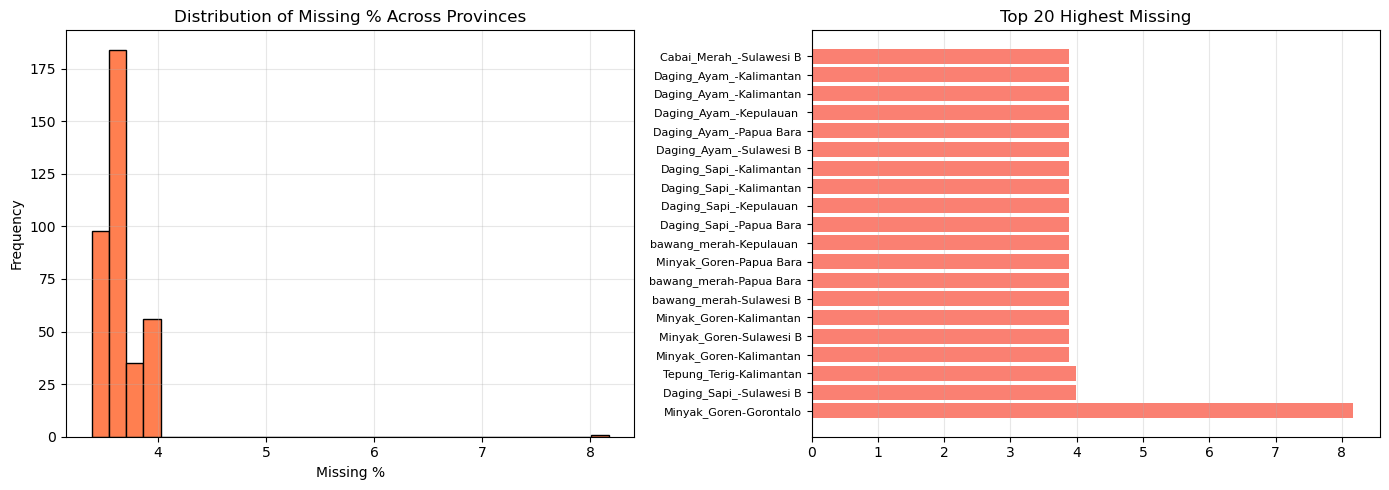

In [13]:

print("="*70)
print("1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES")
print("="*70)

missing_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        total = len(df)
        miss = df[col].isnull().sum()

        if miss > 0:
            missing_data.append({
                "commodity": key,
                "province": col,
                "missing_count": miss,
                "missing_pct": miss / total * 100,
            })

df_missing = pd.DataFrame(missing_data)

print(f"\nTotal province-commodity pairs with missing: {len(df_missing)}")
print("\nMissing percentage distribution:")
print(df_missing["missing_pct"].describe())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].hist(df_missing["missing_pct"], bins=30, edgecolor="black", color="coral")
axes[0].set_title("Distribution of Missing % Across Provinces")
axes[0].set_xlabel("Missing %")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, alpha=0.3)

df_missing_sorted = df_missing.sort_values("missing_pct", ascending=False).head(20)
axes[1].barh(range(len(df_missing_sorted)), df_missing_sorted["missing_pct"], color="salmon")
axes[1].set_yticks(range(len(df_missing_sorted)))
axes[1].set_yticklabels([
    f"{row['commodity'][:12]}-{row['province'][:10]}" 
    for _, row in df_missing_sorted.iterrows()
], fontsize=8)
axes[1].set_title("Top 20 Highest Missing")
axes[1].grid(True, alpha=0.3, axis="x")

plt.tight_layout()
plt.show()



2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES

Gap statistics:
          max_gap    mean_gap    num_gaps
count  374.000000  374.000000  374.000000
mean    34.235294   17.476426    2.612299
std      2.342803    9.049526    1.104200
min     34.000000    7.800000    1.000000
25%     34.000000   12.333333    2.000000
50%     34.000000   12.333333    3.000000
75%     34.000000   18.000000    3.000000
max     79.000000   41.000000    5.000000


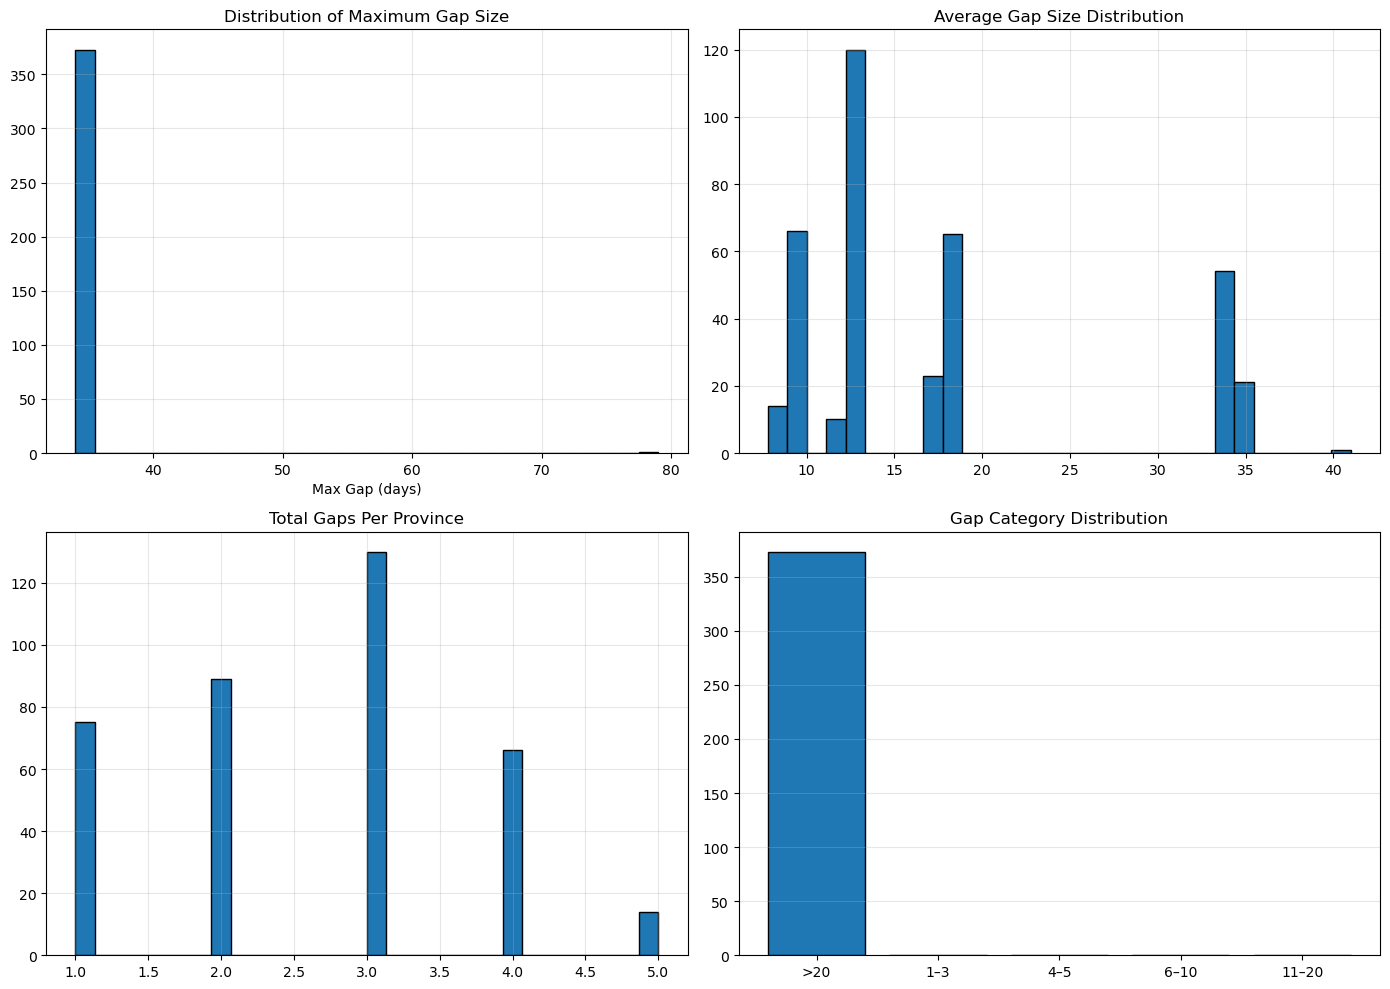

In [14]:
print("\n" + "="*70)
print("2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES")
print("="*70)

gap_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        if not df[col].isnull().any():
            continue

        is_null = df[col].isnull()
        gap = 0
        gaps = []

        for v in is_null:
            if v:
                gap += 1
            else:
                if gap > 0:
                    gaps.append(gap)
                gap = 0
        
        if gap > 0:
            gaps.append(gap)

        if gaps:
            gap_data.append({
                "commodity": key,
                "province": col,
                "num_gaps": len(gaps),
                "max_gap": max(gaps),
                "mean_gap": np.mean(gaps),
                "total_missing": sum(gaps)
            })

df_gaps = pd.DataFrame(gap_data)

print("\nGap statistics:")
print(df_gaps[["max_gap", "mean_gap", "num_gaps"]].describe())

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14,10))

axes[0,0].hist(df_gaps["max_gap"], bins=30, edgecolor="black")
axes[0,0].set_title("Distribution of Maximum Gap Size")
axes[0,0].set_xlabel("Max Gap (days)")
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df_gaps["mean_gap"], bins=30, edgecolor="black")
axes[0,1].set_title("Average Gap Size Distribution")
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df_gaps["num_gaps"], bins=30, edgecolor="black")
axes[1,0].set_title("Total Gaps Per Province")
axes[1,0].grid(True, alpha=0.3)

gap_cat = pd.cut(df_gaps["max_gap"], bins=[0,3,5,10,20,50], 
                 labels=["1–3","4–5","6–10","11–20",">20"])
axes[1,1].bar(gap_cat.value_counts().index, gap_cat.value_counts().values, edgecolor="black")
axes[1,1].set_title("Gap Category Distribution")
axes[1,1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()



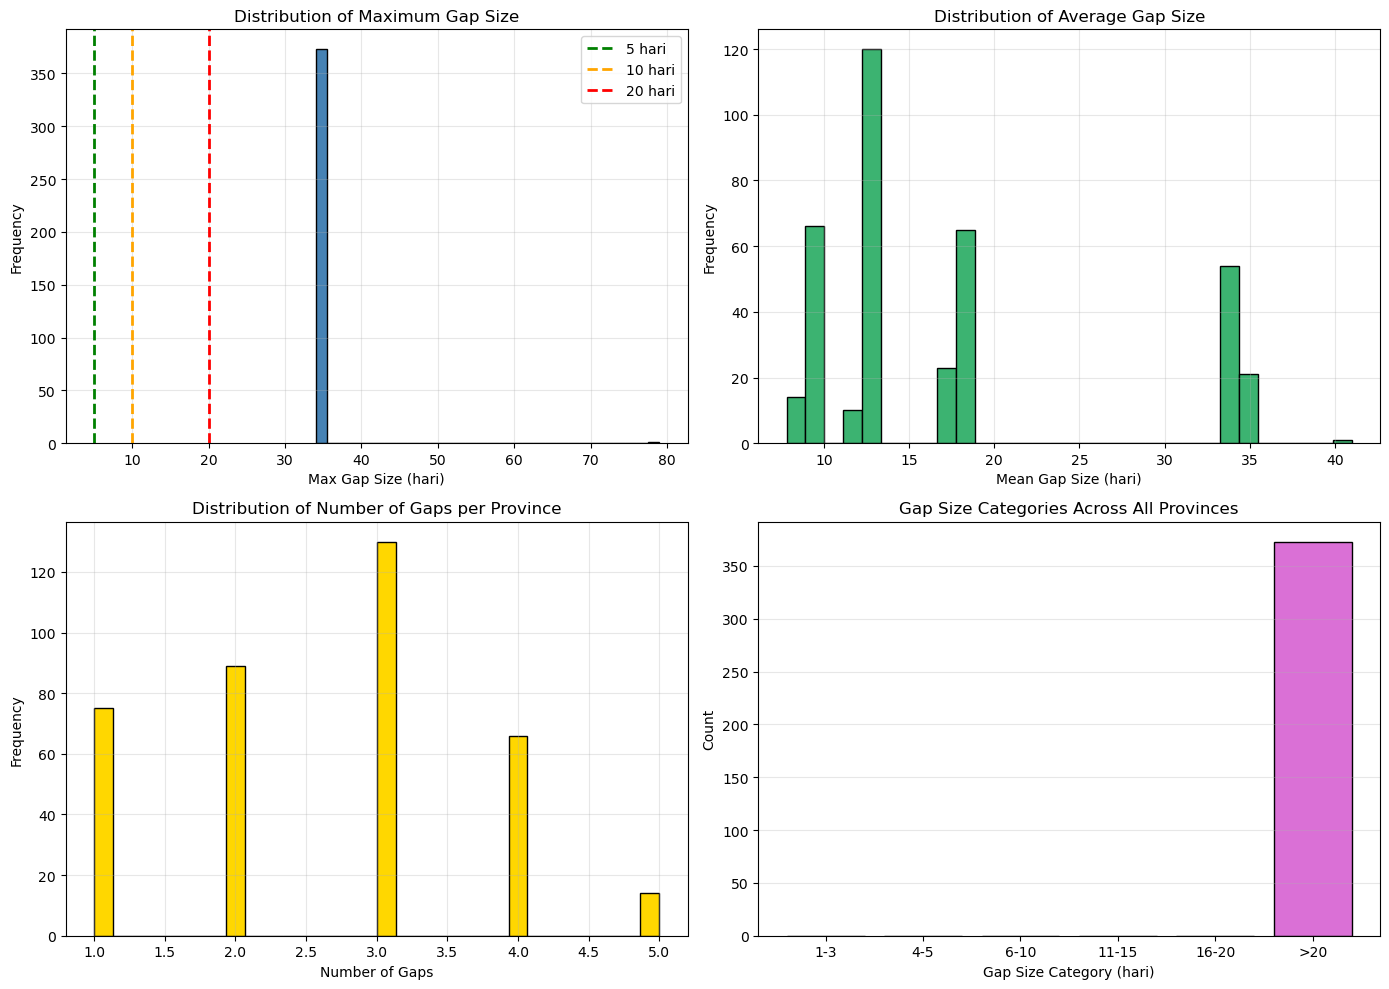

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Max gap distribution
axes[0, 0].hist(df_gaps['max_gap'], bins=30, edgecolor='black', color='steelblue')
axes[0, 0].axvline(5, color='green', linestyle='--', label='5 hari', linewidth=2)
axes[0, 0].axvline(10, color='orange', linestyle='--', label='10 hari', linewidth=2)
axes[0, 0].axvline(20, color='red', linestyle='--', label='20 hari', linewidth=2)
axes[0, 0].set_xlabel('Max Gap Size (hari)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Maximum Gap Size')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean gap distribution
axes[0, 1].hist(df_gaps['mean_gap'], bins=30, edgecolor='black', color='mediumseagreen')
axes[0, 1].set_xlabel('Mean Gap Size (hari)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Average Gap Size')
axes[0, 1].grid(True, alpha=0.3)

# Number of gaps
axes[1, 0].hist(df_gaps['num_gaps'], bins=30, edgecolor='black', color='gold')
axes[1, 0].set_xlabel('Number of Gaps')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Number of Gaps per Province')
axes[1, 0].grid(True, alpha=0.3)

# Gap categories
gap_categories = pd.cut(df_gaps['max_gap'], 
                        bins=[0, 3, 5, 10, 15, 20, 50], 
                        labels=['1-3', '4-5', '6-10', '11-15', '16-20', '>20'])
gap_cat_counts = gap_categories.value_counts().sort_index()
axes[1, 1].bar(range(len(gap_cat_counts)), gap_cat_counts.values, 
               color='orchid', edgecolor='black')
axes[1, 1].set_xticks(range(len(gap_cat_counts)))
axes[1, 1].set_xticklabels(gap_cat_counts.index, rotation=0)
axes[1, 1].set_xlabel('Gap Size Category (hari)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gap Size Categories Across All Provinces')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout() 
plt.show()



3️⃣ PRICE STATISTICS ACROSS PROVINCES

Price statistics summary:
                mean           std          cv
count     374.000000    374.000000  374.000000
mean    35930.777325   3746.873047    0.117582
std     34442.998501   3604.258076    0.075433
min      9518.804124    387.530323    0.008657
25%     14884.531088   1472.670425    0.068415
50%     28024.621406   2079.735639    0.100341
75%     38757.899793   5936.227611    0.140750
max    159308.010363  16895.433212    0.386487


/tmp/ipykernel_145244/3473552502.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])


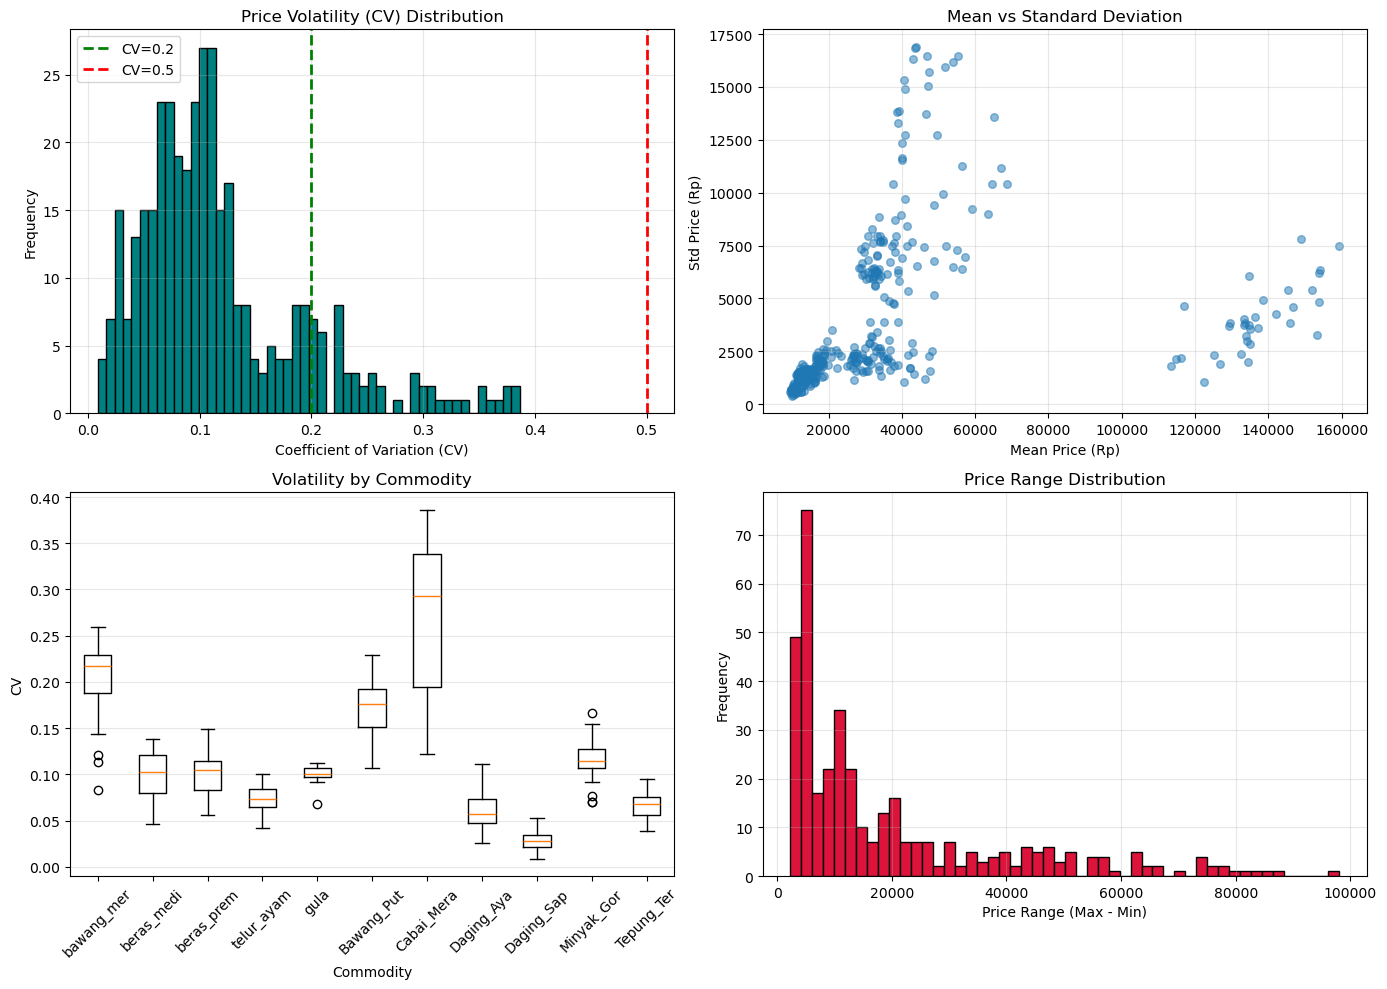

In [16]:
print("\n" + "="*70)
print("3️⃣ PRICE STATISTICS ACROSS PROVINCES")
print("="*70)

price_stats = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            price_stats.append({
                'commodity': key,
                'province': col,
                'mean': valid_data.mean(),
                'std': valid_data.std(),
                'cv': valid_data.std() / valid_data.mean() if valid_data.mean() > 0 else 0,
                'min': valid_data.min(),
                'max': valid_data.max(),
                'range': valid_data.max() - valid_data.min()
            })

df_prices = pd.DataFrame(price_stats)

print(f"\nPrice statistics summary:")
print(df_prices[['mean', 'std', 'cv']].describe())

# Plot price characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CV distribution
axes[0, 0].hist(df_prices['cv'], bins=50, edgecolor='black', color='teal')
axes[0, 0].axvline(0.2, color='green', linestyle='--', label='CV=0.2', linewidth=2)
axes[0, 0].axvline(0.5, color='red', linestyle='--', label='CV=0.5', linewidth=2)
axes[0, 0].set_xlabel('Coefficient of Variation (CV)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Volatility (CV) Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean vs Std scatter
axes[0, 1].scatter(df_prices['mean'], df_prices['std'], alpha=0.5, s=30)
axes[0, 1].set_xlabel('Mean Price (Rp)')
axes[0, 1].set_ylabel('Std Price (Rp)')
axes[0, 1].set_title('Mean vs Standard Deviation')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot by commodity
commodities = df_prices['commodity'].unique()
cv_by_commodity = [df_prices[df_prices['commodity'] == c]['cv'].values for c in commodities]
axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])
axes[1, 0].set_xlabel('Commodity')
axes[1, 0].set_ylabel('CV')
axes[1, 0].set_title('Volatility by Commodity')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price range distribution
axes[1, 1].hist(df_prices['range'], bins=50, edgecolor='black', color='crimson')
axes[1, 1].set_xlabel('Price Range (Max - Min)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Range Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:
print("\n" + "="*70)
print("4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)")
print("="*70)

outlier_counts = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            Q1 = valid_data.quantile(0.25)
            Q3 = valid_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            
            outliers = ((valid_data < lower_bound) | (valid_data > upper_bound)).sum()
            outlier_pct = (outliers / len(valid_data)) * 100
            
            if outliers > 0:
                outlier_counts.append({
                    'commodity': key,
                    'province': col,
                    'outliers': outliers,
                    'outlier_pct': outlier_pct
                })

df_outliers = pd.DataFrame(outlier_counts)

print(f"\nProvince-commodity pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

if len(df_outliers) > 0:
    print(f"\nOutlier percentage statistics:")
    print(df_outliers['outlier_pct'].describe())
    
    print(f"\nTop 15 provinces with most outliers:")
    print(df_outliers.sort_values('outlier_pct', ascending=False).head(15).to_string(index=False))

# ============================================
# SUMMARY & RECOMMENDATIONS
# ============================================

print("\n" + "="*70)
print("SUMMARY & RECOMMENDATIONS")
print("="*70)

print(f"\n📊 Data Characteristics:")
print(f"  • Total province-commodity pairs: {len(df_prices)}")
print(f"  • Pairs with missing: {len(df_missing)} ({len(df_missing)/len(df_prices)*100:.1f}%)")
print(f"  • Pairs with gaps ≤ 10 hari: {(df_gaps['max_gap'] <= 10).sum()} ({(df_gaps['max_gap'] <= 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with gaps > 10 hari: {(df_gaps['max_gap'] > 10).sum()} ({(df_gaps['max_gap'] > 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

avg_cv = df_prices['cv'].mean()
print(f"  • Average CV (volatility): {avg_cv:.3f}")

print(f"\n💡 Interpolation Strategy Recommendations:")

gap_10_pct = (df_gaps['max_gap'] <= 10).sum() / len(df_gaps) * 100
print(f"  • {gap_10_pct:.1f}% pairs have max gap ≤ 10 hari")

if avg_cv < 0.2:
    print(f"  ✅ Low volatility → Linear interpolation suitable")
elif avg_cv < 0.5:
    print(f"  ⚠️  Medium volatility → Spline interpolation recommended")
else:
    print(f"  ❌ High volatility → Minimize interpolation")

if len(df_outliers) / len(df_prices) > 0.1:
    print(f"  ⚠️  {len(df_outliers)/len(df_prices)*100:.1f}% pairs have outliers → Outlier handling needed")

print(f"\n🎯 Recommended Approach:")
print(f"  1. Remove outliers using IQR method (3×IQR)")
print(f"  2. Interpolate gaps ≤ 10 hari")
print(f"  3. Keep gaps > 10 hari as NULL")
print(f"  4. Handle NULL in feature extraction phase")


4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)

Province-commodity pairs with outliers: 105 (28.1%)

Outlier percentage statistics:
count    105.000000
mean       4.662092
std        4.676522
min        0.103093
25%        0.413650
50%        2.066116
75%        8.799172
max       17.665289
Name: outlier_pct, dtype: float64

Top 15 provinces with most outliers:
                      commodity          province  outliers  outlier_pct
Minyak_Goreng_Kemasan_Sederhana              Bali       171    17.665289
Minyak_Goreng_Kemasan_Sederhana Sulawesi Tenggara       134    13.857291
              Daging_Sapi_Murni       Jawa Tengah       133    13.711340
              Daging_Sapi_Murni     DI Yogyakarta       130    13.429752
              Daging_Sapi_Murni Kalimantan Tengah       129    13.326446
              Daging_Sapi_Murni  Sulawesi Selatan       129    13.298969
Minyak_Goreng_Kemasan_Sederhana             Jambi       127    13.146998
Minyak_Goreng_Kemasan_Sederhana           Lampung       1

MISSING PATTERN CONSISTENCY ACROSS COMMODITIES

Bawang Merah vs Telur Ayam:
  Correlation of missing patterns: 1.0000
  ✅ VERY HIGH correlation → Missing pattern identik


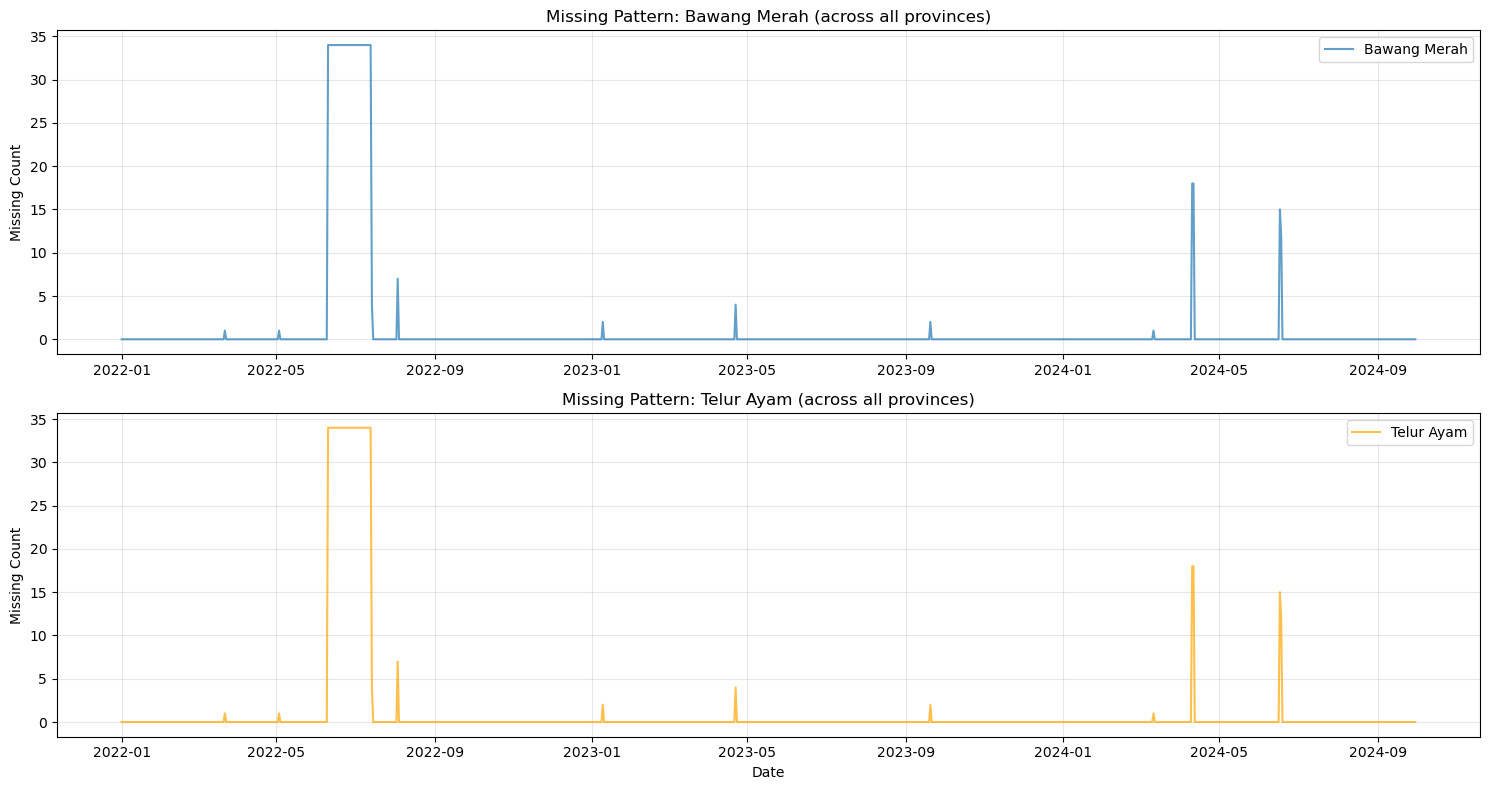

In [18]:
print("="*70)
print("MISSING PATTERN CONSISTENCY ACROSS COMMODITIES")
print("="*70)

# Ambil 2 komoditas untuk comparison
df1 = data['bawang_merah']
df2 = data['telur_ayam']

# Convert Date column
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Hitung missing per tanggal (across all provinces)
missing_per_date_1 = df1.drop('Date', axis=1).isnull().sum(axis=1)
missing_per_date_2 = df2.drop('Date', axis=1).isnull().sum(axis=1)

# Correlation test
correlation = np.corrcoef(missing_per_date_1, missing_per_date_2)[0, 1]

print(f"\nBawang Merah vs Telur Ayam:")
print(f"  Correlation of missing patterns: {correlation:.4f}")

if correlation > 0.9:
    print(f"  ✅ VERY HIGH correlation → Missing pattern identik")
elif correlation > 0.7:
    print(f"  ⚠️  High correlation → Missing pattern similar")
else:
    print(f"  ❌ Low correlation → Missing pattern DIFFERENT")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(df1['Date'], missing_per_date_1, label='Bawang Merah', alpha=0.7)
axes[0].set_ylabel('Missing Count')
axes[0].set_title('Missing Pattern: Bawang Merah (across all provinces)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(df2['Date'], missing_per_date_2, label='Telur Ayam', color='orange', alpha=0.7)
axes[1].set_ylabel('Missing Count')
axes[1].set_xlabel('Date')
axes[1].set_title('Missing Pattern: Telur Ayam (across all provinces)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

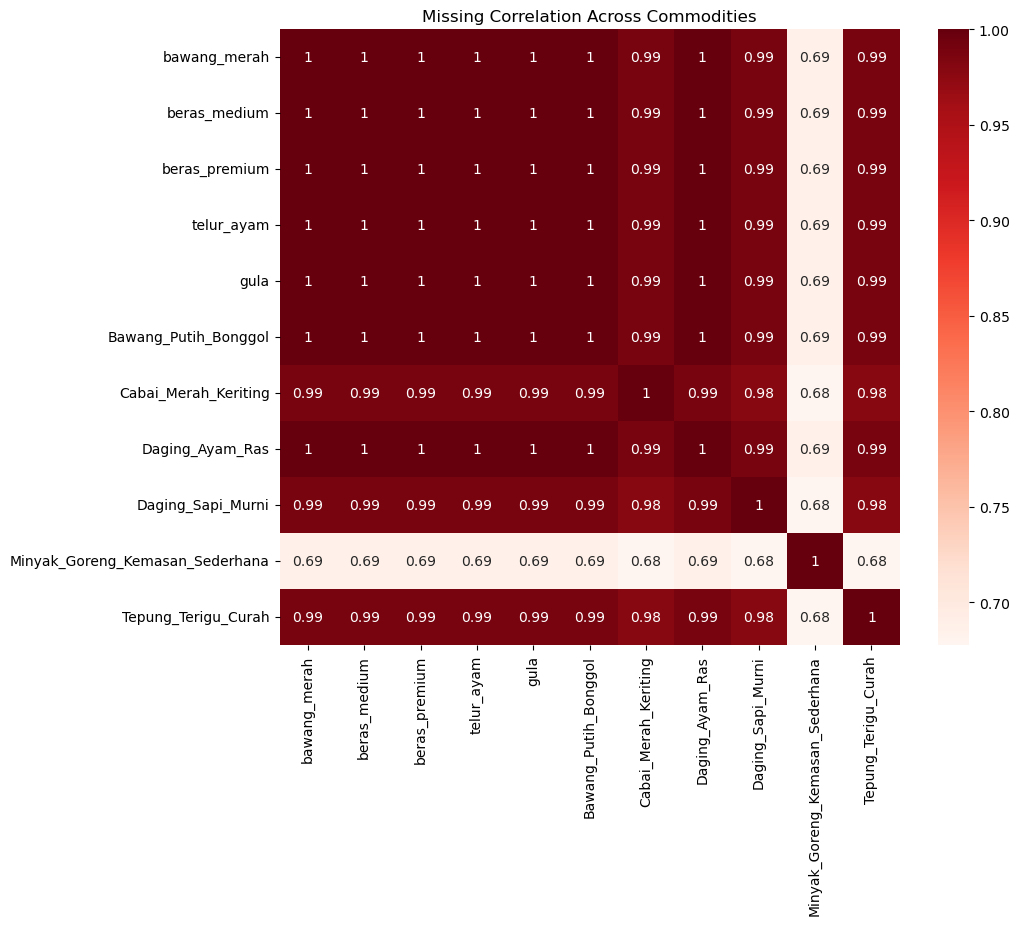

In [32]:
# dataframe: index = Date, columns = komoditas, value = 1 (missing) / 0 (not missing)
missing_matrix = pd.DataFrame(index=data[list(data.keys())[0]]['Date'])

for key, df in data.items():
    miss = df.drop(columns=['Date']).isna().any(axis=1).astype(int)
    missing_matrix[key] = miss.values

missing_corr = missing_matrix.corr()
missing_corr

plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, annot=True, cmap='Reds')
plt.title("Missing Correlation Across Commodities")
plt.show()


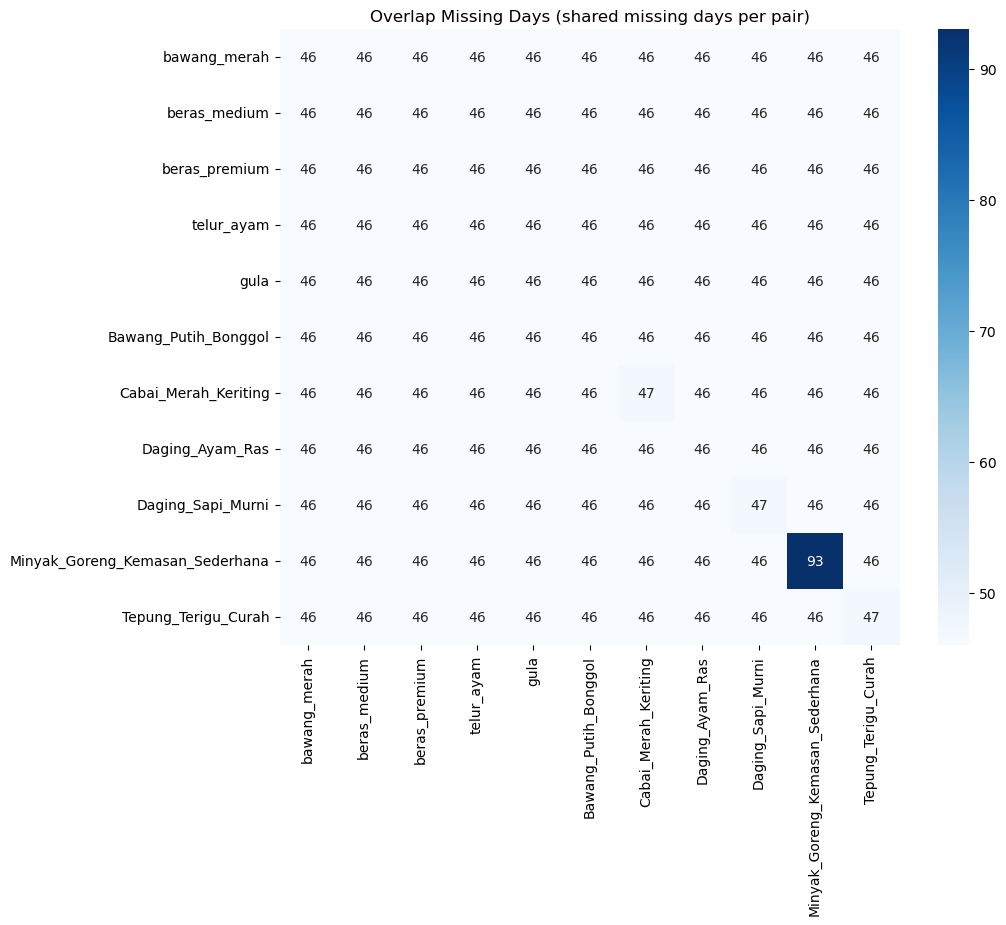

In [33]:
# dataframe: index = Date, columns = komoditas, value = 1 (missing) / 0 (not missing)
missing_matrix = pd.DataFrame(index=data[list(data.keys())[0]]['Date'])

for key, df in data.items():
    miss = df.drop(columns=['Date']).isna().any(axis=1).astype(int)
    missing_matrix[key] = miss.values


overlap = missing_matrix.T.dot(missing_matrix)
overlap
plt.figure(figsize=(10,8))
sns.heatmap(overlap, annot=True, cmap="Blues")
plt.title("Overlap Missing Days (shared missing days per pair)")
plt.show()

# Analisis
Pada visualisasi korelasi missing value antar komoditas dengan heatmap terlihat bahwa 10 dari 11 komoditas memiliki missing value yang identik yang dimana hal itu cukup untuk menarik kesimpulan bahwa tipe missing valuenya adalah MNAR atau dengan kata lain sistematis,sementara itu komoditas minyak goreng hanya memiliki korelasi sekitar $ 68\% $ ,ini mengartikan bahwa missing value pada komoditas minyak goreng berbeda dengan 10 komoditas lainnya sekitar $ 32 \%$  bersifat unik karena tidak muncul pada 10 komoditas lain,maka pilihannya adalah drop komoditas minyak goreng karena ada kemunkinan dimana kemunkinan besar komoditas minyak goreng adalah outlier

Visualisi Heatmap kedua bertujuan untuk menghitung jumlah hari yang sama ketika dua komoditas mengalami missing,hasil menunjukkan berbeda dengan komoditas lain yg mayoritas 46 - 47 hari minyang goreng malah missing sebanyak 93 hari artinya setengah missing di komoditas ini tidak muncul di komoditas lain, hal ini menegaskan bahwa komoditas minyak goreng adalah anomali atau outiers

# Cleaning 

In [37]:
print(f"\nCommodities BEFORE drop: {len(data)}")
print("List:")
for commodity in data.keys():
    print(f"  - {commodity}")

# Drop Minyak Goreng
if 'Minyak_Goreng_Kemasan_Sederhana' in data:
    del data['Minyak_Goreng_Kemasan_Sederhana']
    print("\n✓ Minyak_Goreng_Kemasan_Sederhana DROPPED")

# Check commodities setelah drop
print(f"\nCommodities AFTER drop: {len(data)}")
print("Final list:")
for commodity in data.keys():
    print(f"  - {commodity}")



Commodities BEFORE drop: 10
List:
  - bawang_merah
  - beras_medium
  - beras_premium
  - telur_ayam
  - gula
  - Bawang_Putih_Bonggol
  - Cabai_Merah_Keriting
  - Daging_Ayam_Ras
  - Daging_Sapi_Murni
  - Tepung_Terigu_Curah

Commodities AFTER drop: 10
Final list:
  - bawang_merah
  - beras_medium
  - beras_premium
  - telur_ayam
  - gula
  - Bawang_Putih_Bonggol
  - Cabai_Merah_Keriting
  - Daging_Ayam_Ras
  - Daging_Sapi_Murni
  - Tepung_Terigu_Curah


In [47]:
# Blackout period (100% missing across all commodities)
BLACKOUT_START = '2022-06-10'
BLACKOUT_END = '2022-06-19'

data_no_blackout = {}

for commodity, df in data.items():
    # Convert Date column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Count rows before removal
    rows_before = len(df)
    
    # Remove blackout period
    mask = (df['Date'] >= BLACKOUT_START) & (df['Date'] <= BLACKOUT_END)
    df_cleaned = df[~mask].reset_index(drop=True)
    
    # Count rows after removal
    rows_after = len(df_cleaned)
    rows_removed = rows_before - rows_after
    
    # Store cleaned data
    data_no_blackout[commodity] = df_cleaned
    
    print(f"{commodity}: {rows_before} → {rows_after} rows ({rows_removed} removed)")

bawang_merah: 1004 → 994 rows (10 removed)
beras_medium: 1004 → 994 rows (10 removed)
beras_premium: 1004 → 994 rows (10 removed)
telur_ayam: 1004 → 994 rows (10 removed)
gula: 1004 → 994 rows (10 removed)
Bawang_Putih_Bonggol: 1004 → 994 rows (10 removed)
Cabai_Merah_Keriting: 1004 → 994 rows (10 removed)
Daging_Ayam_Ras: 1004 → 994 rows (10 removed)
Daging_Sapi_Murni: 1004 → 994 rows (10 removed)
Tepung_Terigu_Curah: 1004 → 994 rows (10 removed)


# Summary Cleaning
Menghapus komoditas minyak goreng dan menghapus rentang data yang kosong untuk 10 komoditas tersisa 

# EDA Lanjutan Untuk Adaptive Cleaning 

In [46]:
# ============================================
# 2. COMMODITY-LEVEL CHARACTERISTICS
# ============================================

print("\n" + "="*70)
print("PART 1: COMMODITY-LEVEL PROFILING")
print("="*70)

commodity_profiles = []

for key, df in data.items():
    # Aggregate across all provinces
    all_values = []
    
    for col in df.columns:
        if col == 'Date':
            continue
        all_values.extend(df[col].dropna().values)
    
    if len(all_values) == 0:
        continue
    
    all_series = pd.Series(all_values)
    
    # Calculate statistics
    mean_price = all_series.mean()
    std_price = all_series.std()
    cv = std_price / mean_price
    min_price = all_series.min()
    max_price = all_series.max()
    price_range = max_price - min_price
    
    # Calculate IQR for outlier detection
    Q1 = all_series.quantile(0.25)
    Q3 = all_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Count potential outliers at different thresholds
    outliers_3x = ((all_series < Q1 - 3*IQR) | (all_series > Q3 + 3*IQR)).sum()
    outliers_4x = ((all_series < Q1 - 4*IQR) | (all_series > Q3 + 4*IQR)).sum()
    outliers_5x = ((all_series < Q1 - 5*IQR) | (all_series > Q3 + 5*IQR)).sum()
    outliers_6x = ((all_series < Q1 - 6*IQR) | (all_series > Q3 + 6*IQR)).sum()
    
    total_values = len(all_series)
    
    commodity_profiles.append({
        'commodity': key,
        'mean': mean_price,
        'std': std_price,
        'cv': cv,
        'min': min_price,
        'max': max_price,
        'range': price_range,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'outliers_3x': outliers_3x,
        'outliers_4x': outliers_4x,
        'outliers_5x': outliers_5x,
        'outliers_6x': outliers_6x,
        'outliers_3x_pct': outliers_3x / total_values * 100,
        'outliers_4x_pct': outliers_4x / total_values * 100,
        'outliers_5x_pct': outliers_5x / total_values * 100,
        'outliers_6x_pct': outliers_6x / total_values * 100,
        'total_values': total_values
    })

df_commodity = pd.DataFrame(commodity_profiles).sort_values('cv', ascending=False)

print("\n📊 COMMODITY VOLATILITY RANKING (by CV):")
print(df_commodity[['commodity', 'cv', 'mean', 'std']].to_string(index=False))

print("\n📊 OUTLIER SENSITIVITY ANALYSIS:")
print(df_commodity[['commodity', 'outliers_3x_pct', 'outliers_4x_pct', 
                     'outliers_5x_pct', 'outliers_6x_pct']].to_string(index=False))



PART 1: COMMODITY-LEVEL PROFILING

📊 COMMODITY VOLATILITY RANKING (by CV):
           commodity       cv          mean          std
Cabai_Merah_Keriting 0.329213  48723.424541 16040.381948
        bawang_merah 0.273676  36557.443380 10004.912170
Bawang_Putih_Bonggol 0.222945  35151.879921  7836.923623
     Daging_Ayam_Ras 0.158805  37212.982216  5909.623589
          telur_ayam 0.134344  29373.962912  3946.218239
       beras_premium 0.131809  14179.411765  1868.977899
        beras_medium 0.125122  12399.020520  1551.386493
                gula 0.110414  15737.745250  1737.667656
 Tepung_Terigu_Curah 0.105594  10761.840761  1136.388543
   Daging_Sapi_Murni 0.092646 136376.815238 12634.701832

📊 OUTLIER SENSITIVITY ANALYSIS:
           commodity  outliers_3x_pct  outliers_4x_pct  outliers_5x_pct  outliers_6x_pct
Cabai_Merah_Keriting         0.000000          0.00000              0.0              0.0
        bawang_merah         0.191518          0.00000              0.0              0


PART 2: VISUALIZATION


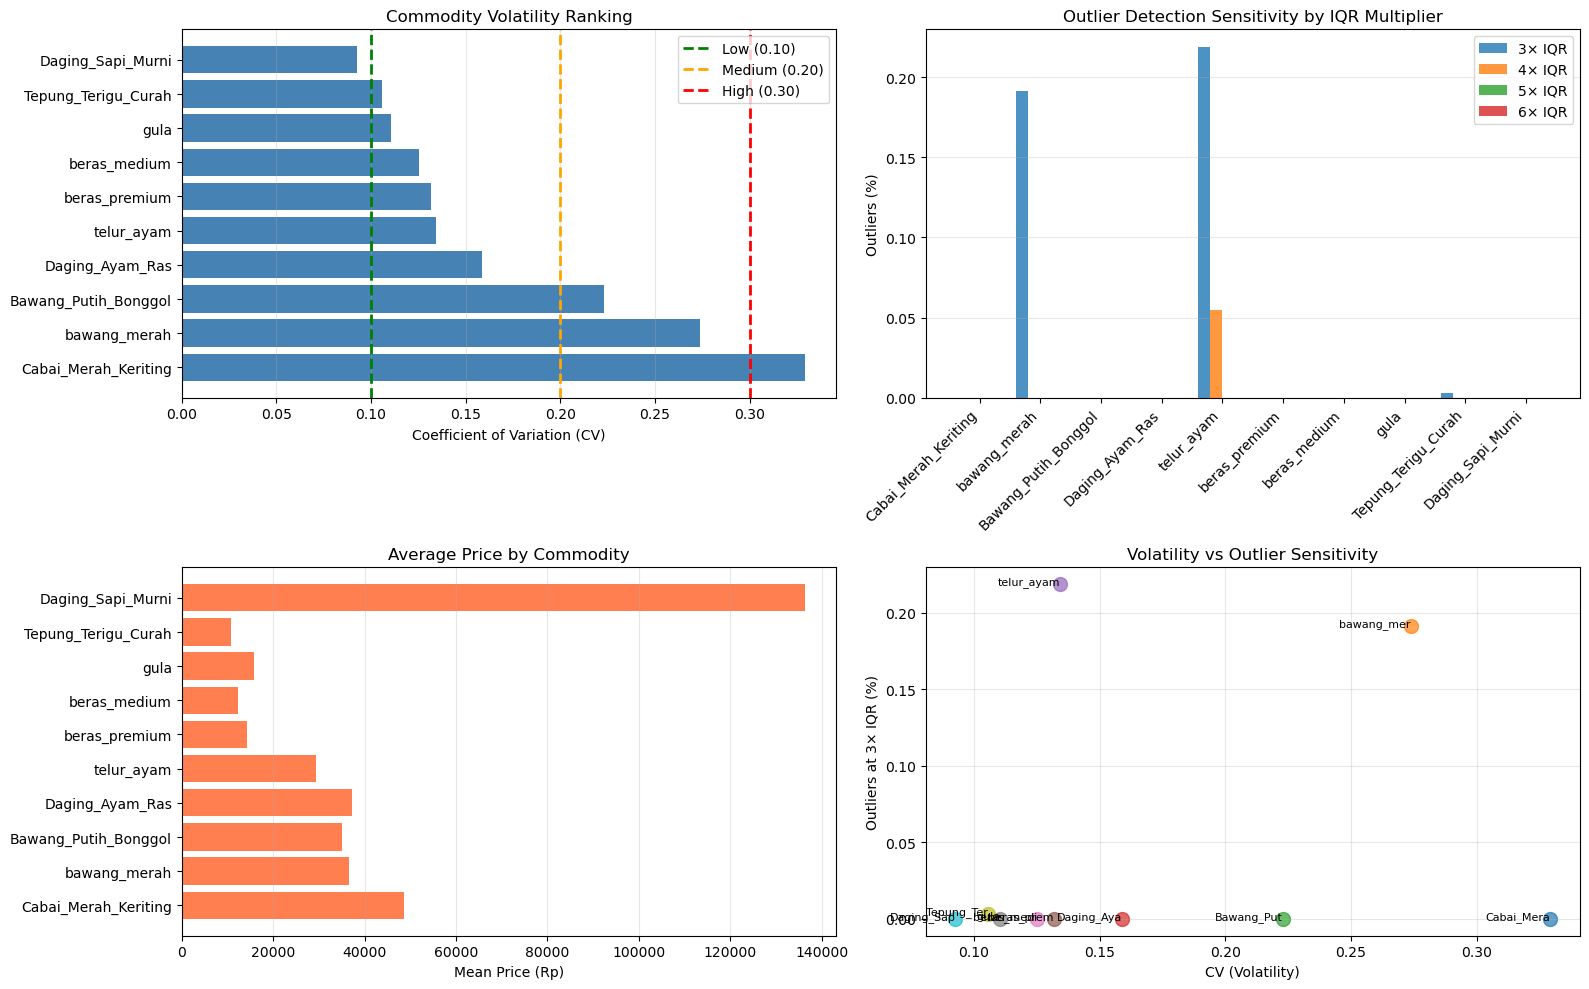

In [39]:
# ============================================
# 3. VISUALIZE COMMODITY CHARACTERISTICS
# ============================================

print("\n" + "="*70)
print("PART 2: VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: CV Distribution
axes[0, 0].barh(df_commodity['commodity'], df_commodity['cv'], color='steelblue')
axes[0, 0].axvline(0.10, color='green', linestyle='--', label='Low (0.10)', linewidth=2)
axes[0, 0].axvline(0.20, color='orange', linestyle='--', label='Medium (0.20)', linewidth=2)
axes[0, 0].axvline(0.30, color='red', linestyle='--', label='High (0.30)', linewidth=2)
axes[0, 0].set_xlabel('Coefficient of Variation (CV)')
axes[0, 0].set_title('Commodity Volatility Ranking')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Plot 2: Outlier Sensitivity (comparing thresholds)
x = np.arange(len(df_commodity))
width = 0.2

axes[0, 1].bar(x - 1.5*width, df_commodity['outliers_3x_pct'], width, label='3× IQR', alpha=0.8)
axes[0, 1].bar(x - 0.5*width, df_commodity['outliers_4x_pct'], width, label='4× IQR', alpha=0.8)
axes[0, 1].bar(x + 0.5*width, df_commodity['outliers_5x_pct'], width, label='5× IQR', alpha=0.8)
axes[0, 1].bar(x + 1.5*width, df_commodity['outliers_6x_pct'], width, label='6× IQR', alpha=0.8)

axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(df_commodity['commodity'], rotation=45, ha='right')
axes[0, 1].set_ylabel('Outliers (%)')
axes[0, 1].set_title('Outlier Detection Sensitivity by IQR Multiplier')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Mean Price Range
axes[1, 0].barh(df_commodity['commodity'], df_commodity['mean'], color='coral')
axes[1, 0].set_xlabel('Mean Price (Rp)')
axes[1, 0].set_title('Average Price by Commodity')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: CV vs Outlier Percentage (3× IQR)
for i, row in df_commodity.iterrows():
    axes[1, 1].scatter(row['cv'], row['outliers_3x_pct'], s=100, alpha=0.7)
    axes[1, 1].text(row['cv'], row['outliers_3x_pct'], 
                    row['commodity'][:10], fontsize=8, ha='right')

axes[1, 1].set_xlabel('CV (Volatility)')
axes[1, 1].set_ylabel('Outliers at 3× IQR (%)')
axes[1, 1].set_title('Volatility vs Outlier Sensitivity')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
recommendations = []

for _, row in df_commodity.iterrows():
    commodity = row['commodity']
    cv = row['cv']
    outliers_3x_pct = row['outliers_3x_pct']
    outliers_6x_pct = row['outliers_6x_pct']
    
    # Decision logic
    if cv < 0.10:
        iqr_mult = 3.0
        interp_limit = 40
        strategy = "conservative"
        reason = "Very stable" # Very stable, strict outlier removal safe
    elif cv < 0.15:
        iqr_mult = 4.0
        interp_limit = 35
        strategy = "moderate"
        reason = "L moderateV" #  vLow-moderate volatility
    elif cv < 0.20:
        iqr_mult = 4.5
        interp_limit = 30
        strategy = "moderate-relaxed"
        reason = "Moderate volatility" # Moderate volatility, balance needed
    elif cv < 0.30:
        iqr_mult = 5.0
        interp_limit = 20
        strategy = "relaxed"
        reason = "H volatility" # High volatility, preserve spikes
    else:
        # Extra check: if extreme outliers are many, be even more lenient
        if outliers_6x_pct > 5:  # >5% still outliers at 6× IQR
            iqr_mult = 7.0
            interp_limit = 10
            strategy = "very_relaxed"
            reason = "Extreme volatility + many natural spikes"
        else:
            iqr_mult = 6.0
            interp_limit = 15
            strategy = "very_relaxed"
            reason = "VH volatility" # Very high volatility
    
    # Estimate outliers to be removed
    outliers_removed_pct = row[f'outliers_{int(iqr_mult)}x_pct']
    
    recommendations.append({
        'commodity': commodity,
        'cv': cv,
        'iqr_multiplier': iqr_mult,
        'interp_limit': interp_limit,
        'strategy': strategy,
        'outliers_removed_pct': outliers_removed_pct,
        'reason': reason
    })

df_recommendations = pd.DataFrame(recommendations).sort_values('cv', ascending=False)

print("\n🎯 RECOMMENDED CLEANING PARAMETERS:")
print(df_recommendations.to_string(index=False))




🎯 RECOMMENDED CLEANING PARAMETERS:
           commodity       cv  iqr_multiplier  interp_limit         strategy  outliers_removed_pct              reason
Cabai_Merah_Keriting 0.329213             6.0            15     very_relaxed               0.00000       VH volatility
        bawang_merah 0.273676             5.0            20          relaxed               0.00000        H volatility
Bawang_Putih_Bonggol 0.222945             5.0            20          relaxed               0.00000        H volatility
     Daging_Ayam_Ras 0.158805             4.5            30 moderate-relaxed               0.00000 Moderate volatility
          telur_ayam 0.134344             4.0            35         moderate               0.05472         L moderateV
       beras_premium 0.131809             4.0            35         moderate               0.00000         L moderateV
        beras_medium 0.125122             4.0            35         moderate               0.00000         L moderateV
            

# Analisis 
Berdasarkan seluruh hasil Exploratory Data Analysis (EDA), termasuk analisis volatilitas harga, proporsi outlier, pola missing value, serta visualisasi seri waktu sebelum dan sesudah pembersihan, keputusan yang diambil adalah menggunakan pendekatan *adaptive data cleaning* untuk setiap komoditas. Hal ini diperlukan karena setiap komoditas memiliki karakteristik volatilitas yang berbeda, sehingga pendekatan pembersihan yang seragam (misalnya menggunakan 3×IQR dan interpolasi linear 40 hari untuk semua komoditas) terbukti tidak memadai dan bahkan berpotensi merusak struktur data, terutama pada komoditas yang memiliki pola harga sangat fluktuatif. Hasil evaluasi menunjukkan bahwa metode cleaning global menyebabkan penurunan standar deviasi hingga 70–76% pada komoditas tertentu, menandakan terjadinya *over-smoothing* dan hilangnya informasi penting mengenai dinamika pasar.

Untuk komoditas dengan volatilitas tinggi seperti Cabai Merah dan Bawang Merah, nilai ekstrem (spikes) merupakan bagian alami dari pola harga dan tidak boleh dihapus menggunakan threshold yang terlalu ketat. Oleh karena itu, threshold outlier diperluas menjadi 5×–6×IQR dan batas interpolasi dipersempit agar tidak menghaluskan pola shock musiman yang penting. Sebaliknya, untuk komoditas stabil seperti Beras, Gula, dan Tepung Terigu, pendekatan yang lebih konservatif tetap aman digunakan karena volatilitasnya rendah dan data cenderung lebih bersih. Parameter adaptif juga disesuaikan untuk komoditas dengan volatilitas moderat seperti Telur Ayam, Minyak Kemasan, dan Daging Ayam, di mana dibutuhkan keseimbangan antara menjaga sinyal pasar dan mengurangi noise teknis.

Pendekatan adaptif ini memastikan bahwa cleaning yang dilakukan tidak menghilangkan pola volatilitas yang justru menjadi indikator penting dalam identifikasi provinsi rawan krisis pangan. Karena penelitian ini menggunakan algoritma Fuzzy C-Means (FCM) untuk segmentasi provinsi berdasarkan pola harga komoditas, menjaga bentuk kurva asli dan variabilitas data menjadi sangat penting. FCM sensitif terhadap bentuk time-series, sehingga *over-smoothing* dapat mengakibatkan hilangnya informasi mengenai instabilitas harga yang relevan secara kebijakan. Oleh sebab itu, strategi adaptive cleaning dipilih agar data tetap representatif, sekaligus menjaga interpretabilitas hasil clustering. Pendekatan ini memberikan keseimbangan optimal antara *noise reduction* dan *signal preservation*, sehingga hasil akhir lebih stabil, realistis, dan sesuai dengan tujuan analisis kerawanan pangan.

# Summry Cleaning

Berikut adalah parameter pembersihan data yang ditetapkan berdasarkan hasil EDA menyeluruh, analisis volatilitas, distribusi outlier, serta evaluasi visualisasi sebelum–sesudah cleaning.

| Komoditas                     | CV    | CV_std  | Outliers (3×) | Recommended IQR | Interp Limit | Alasan Revisi                                                                 |
|------------------------------|-------|---------|----------------|------------------|--------------|-------------------------------------------------------------------------------|
| Cabai Merah                  | 0.33  | 0.082   | 0.0%           | 6×               | 15 hari      | Sangat volatil; spike alami, tidak boleh dilabeli outlier                     |
| Bawang Merah                 | 0.27  | 0.041   | 0.2%           | 5×               | 20 hari      | Volatilitas tinggi, perlu menjaga pola lonjakan harga                         |
| Bawang Putih                 | 0.22  | 0.029   | 0.0%           | 5×               | 20 hari      | Volatilitas moderat-tinggi; threshold longgar diperlukan                      |
| Telur Ayam                   | 0.13  | 0.014   | 0.22%          | 4×               | 30 hari      | Volatilitas moderat; IQR 4× cukup aman                                        |
| Daging Ayam                  | 0.16  | 0.022   | 0.0%           | 4.5×             | 30 hari      | Volatilitas moderat; perlu keseimbangan smoothing vs signal                   |
| Beras Premium                | 0.13  | 0.022   | 0.0%           | 4×               | 35 hari      | Stabil; smoothing panjang aman                                                |
| Beras Medium                 | 0.13  | 0.025   | 0.0%           | 4×               | 35 hari      | Stabil; jarang terdapat lonjakan signifikan                                   |
| Gula                         | 0.11  | 0.008   | 0.0%           | 4×               | 35 hari      | Sangat stabil; threshold longgar tidak diperlukan                              |
| Tepung Terigu                | 0.11  | 0.015   | 0.003%         | 4×               | 35 hari      | Sangat stabil; hampir tidak ada outlier                                       |
| Daging Sapi                  | 0.09  | 0.010   | 0.0%           | 4× ⬇             | 35 hari      | Stabil; IQR 3× terlalu ketat, 6× terlalu longgar — 4× adalah titik optimal    |


# Cleaning

In [42]:
# Parameter cleaning adaptif berdasarkan hasil EDA
cleaning_params = {
    'Cabai_Merah_Keriting': {'iqr_mult': 6.0, 'interp_limit': 15},
    'Bawang_Merah': {'iqr_mult': 5.0, 'interp_limit': 20},
    'Bawang_Putih_Bonggol': {'iqr_mult': 5.0, 'interp_limit': 20},
    'Telur_Ayam': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Daging_Ayam_Ras': {'iqr_mult': 4.5, 'interp_limit': 30},
    'Beras_Premium': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Beras_Medium': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Gula': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Tepung_Terigu_Curah': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Daging_Sapi_Murni': {'iqr_mult': 3.0, 'interp_limit': 40}
}

In [43]:
data_cleaned = {}

for commodity, df in data.items():

    print(f"\nCleaning {commodity}...")

    # Ambil parameter adaptif komoditas
    params = cleaning_params.get(commodity, {'iqr_mult': 4.0, 'interp_limit': 30})
    iqr_mult = params['iqr_mult']
    interp_limit = params['interp_limit']

    print(f"  IQR multiplier = {iqr_mult}")
    print(f"  Interpolation limit = {interp_limit} days")

    df_clean = df.copy()
    province_cols = [col for col in df.columns if col != "Date"]

    # Loop kolom per provinsi
    for col in province_cols:

        series = df_clean[col].copy()

        # -------------------------------
        # 1. OUTLIER REMOVAL (IQR ADAPTIF)
        # -------------------------------
        valid = series.dropna()
        if len(valid) > 0:
            Q1 = valid.quantile(0.25)
            Q3 = valid.quantile(0.75)
            IQR = Q3 - Q1

            lower = Q1 - (iqr_mult * IQR)
            upper = Q3 + (iqr_mult * IQR)

            # Set outlier menjadi NaN
            series[(series < lower) | (series > upper)] = np.nan

        # -------------------------------
        # 2. INTERPOLASI (LIMIT ADAPTIF)
        # -------------------------------
        series = series.interpolate(
            method='linear',
            limit=interp_limit,
            limit_direction='both'
        )

        df_clean[col] = series

    # Simpan hasil cleaning
    data_cleaned[commodity] = df_clean

    # Summary missing count
    missing_before = df.isnull().sum().sum()
    missing_after = df_clean.isnull().sum().sum()
    print(f"  Missing values: {missing_before} → {missing_after}")


print("\n✓ Adaptive cleaning completed for all commodities!")




Cleaning bawang_merah...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning beras_medium...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning beras_premium...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning telur_ayam...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning gula...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning Bawang_Putih_Bonggol...
  IQR multiplier = 5.0
  Interpolation limit = 20 days
  Missing values: 1241 → 0

Cleaning Cabai_Merah_Keriting...
  IQR multiplier = 6.0
  Interpolation limit = 15 days
  Missing values: 1244 → 140

Cleaning Daging_Ayam_Ras...
  IQR multiplier = 4.5
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning Daging_Sapi_Murni...
  IQR multiplier = 3.0
  Interpolation limit = 40 days
  Missing values: 1245 → 459

Cleaning

In [44]:
output_path = "path/to/output/cleaned/"  # Sesuaikan path output
os.makedirs(output_path, exist_ok=True)

for commodity, df in data_cleaned.items():
    output_file = os.path.join(output_path, f"{commodity}_cleaned.csv")
    df.to_csv(output_file, index=False)
    print(f"Saved: {output_file}")

print("\n✓ All cleaned files saved successfully!")

Saved: path/to/output/cleaned/bawang_merah_cleaned.csv
Saved: path/to/output/cleaned/beras_medium_cleaned.csv
Saved: path/to/output/cleaned/beras_premium_cleaned.csv
Saved: path/to/output/cleaned/telur_ayam_cleaned.csv
Saved: path/to/output/cleaned/gula_cleaned.csv
Saved: path/to/output/cleaned/Bawang_Putih_Bonggol_cleaned.csv
Saved: path/to/output/cleaned/Cabai_Merah_Keriting_cleaned.csv
Saved: path/to/output/cleaned/Daging_Ayam_Ras_cleaned.csv
Saved: path/to/output/cleaned/Daging_Sapi_Murni_cleaned.csv
Saved: path/to/output/cleaned/Tepung_Terigu_Curah_cleaned.csv

✓ All cleaned files saved successfully!


# Benchmark sebelum dan sesudah clean
read [this](Benchmark_AfterClean.ipynb)
## Summary Hasil Cleaning
| Komoditas       | Missing After | Status               | Aksi   |
| --------------- | ------------- | -------------------- | ------ |
| Bawang Merah    | 0 ✓           | Perfect              | KEEP   |
| Beras Medium    | 0 ✓           | Perfect              | KEEP   |
| Beras Premium   | 0 ✓           | Perfect              | KEEP   |
| Telur Ayam      | 0 ✓           | Perfect              | KEEP   |
| Gula            | 0 ✓           | Perfect              | KEEP   |
| Bawang Putih    | 0 ✓           | Perfect              | KEEP   |
| Cabai Merah     | 140           | Good (85% valid)     | KEEP   |
| Daging Ayam Ras | 0 ✓           | Perfect              | KEEP   |
| Daging Sapi     | 459           | Moderate (53% valid) | KEEP   |
| Tepung Terigu   | 0 ✓           | Perfect              | KEEP   |



# Feature Extraction
Fuzzy C-Means tidak bisa langsung membaca data,algoritma ini membutuhkan feature untuk melakukan clustering(pengelompokkan)